<a href="https://colab.research.google.com/github/NguyenHien19/Credit-risk-for-bank-user/blob/main/PTDL.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:

import pandas as pd
import numpy as np
import re
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from collections import Counter

sns.set(style='white', context='notebook', palette='deep')
pd.options.display.max_columns = 100

from google.colab import files


In [ ]:
sns.set_theme()

## Load dữ liệu sau khi đã được làm sạch bằng cách xóa các nhiễu dữ liệu sử dụng IQR

In [ ]:

dataset = pd.read_csv("cleaned_data.csv")


In [ ]:

dataset.head()


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0.0,2.0
1,1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0.0,1.0
2,2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0.0,0.0
3,3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0.0,0.0
4,4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0.0,0.0


In [ ]:

dataset.shape


(128700, 12)

In [ ]:

dataset.describe()


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,128700.00000,128700.000000,128700.000000,128700.000000,128700.000000,128700.000000,1.038440e+05,128700.000000,128700.000000,128700.000000,128699.000000,125402.000000
mean,64349.50000,0.056457,5.945645,52.401127,0.208959,340.934783,6.694281e+03,8.457793,0.060241,1.014375,0.039829,0.755626
std,37152.63416,0.230803,247.565270,14.777382,0.621974,2118.852497,1.415181e+04,5.078733,0.378831,1.081887,0.242301,1.112001
min,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32174.75000,0.000000,0.029031,41.000000,0.000000,0.173518,3.414000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,64349.50000,0.000000,0.147041,52.000000,0.000000,0.363042,5.416000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,96524.25000,0.000000,0.531432,63.000000,0.000000,0.828121,8.291000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,128699.00000,1.000000,50708.000000,109.000000,13.000000,329664.000000,3.008750e+06,57.000000,17.000000,32.000000,11.000000,20.000000


In [ ]:

dataset.isnull().sum()


Unnamed: 0                                  0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           24856
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        1
NumberOfDependents                       3298
dtype: int64

- Vì ở đây có 2 trường dữ liệu chứa giá trị null (Monthlyincome và NumberOfDependents) nên cần xử lý chúng
- Cách làm : sử dụng hàm fillna() trong thư viện Pandas để điền vào các ô còn thiếu, giá trị điền vào sẽ dựa trên forrward fill

In [ ]:

dataset['MonthlyIncome'].fillna(method='ffill', inplace=True)
dataset['MonthlyIncome'].describe()


count    1.287000e+05
mean     6.691366e+03
std      1.364849e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.291250e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [ ]:

dataset['NumberOfDependents'].fillna(method='ffill', inplace=True)
dataset['NumberOfDependents'].describe()


count    128700.000000
mean          0.755843
std           1.112101
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

##Xử lý chi tiết từng trường dữ liệu

###1. DebtRatio : Tỉ lệ nợ = (Tổng nợ tín dụng + khoản chi định kì trong tháng) / tổng thu nhập định kì hàng tháng

In [ ]:

dataset['DebtRatio'].describe()


count    128700.000000
mean        340.934783
std        2118.852497
min           0.000000
25%           0.173518
50%           0.363042
75%           0.828121
max      329664.000000
Name: DebtRatio, dtype: float64

- Giá trị max như thống kê là ko hợp lệ vì typical value của DebtRatio là 0.4, với trường hợp tỷ lệ nợ > 1 thì khả năng chi trả nợ là không thể, do đó cần lọc lại những bản ghi có DebtRatio > 1 và chỉ xem xét những người dùng có DebtRatio <= 1

In [ ]:

dataset2 = dataset[dataset['DebtRatio']>1]
dataset2['DebtRatio'].describe()


count     29397.000000
mean       1491.589295
std        4235.525915
min           1.000500
25%          41.000000
50%         900.000000
75%        2209.000000
max      329664.000000
Name: DebtRatio, dtype: float64

- Có 33416 bản ghi ko thỏa mãn, ta sẽ xem các giá trị DebtRatio > 1 như NaN và điền lại giá trị sử dụng hàm fillna() trong thư viện Pandas với giá trị cụ thể dựa trên forward fill

In [ ]:

dataset.loc[dataset['DebtRatio']>1, 'DebtRatio']=np.NaN
dataset['DebtRatio'].describe()


count    99303.000000
mean         0.302671
std          0.225819
min          0.000000
25%          0.126019
50%          0.274559
75%          0.437294
max          1.000000
Name: DebtRatio, dtype: float64

In [ ]:

dataset['DebtRatio'].fillna(method='ffill', inplace=True)
dataset['DebtRatio'].describe()


count    128700.000000
mean          0.302691
std           0.225694
min           0.000000
25%           0.126445
50%           0.274345
75%           0.437242
max           1.000000
Name: DebtRatio, dtype: float64

###2. MonthlyIncome : Tổng thu nhập định kỳ hàng tháng

In [ ]:

dataset['MonthlyIncome'].describe()


count    1.287000e+05
mean     6.691366e+03
std      1.364849e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.291250e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

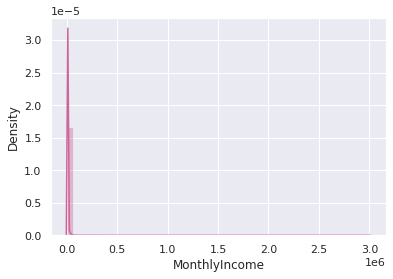

In [ ]:

sns.distplot(dataset['MonthlyIncome'], color='#cc6699')


- MonthlyIncome có vẻ tập trung khá nhiều gần giá trị 0 nên cần xem xét loại bỏ 1 vài giá trị
- Vì để mở thẻ tín dụng thì yêu cầu người dùng phải đảm bảo về thu nhập hàng tháng, cụ thể ở mỹ tối thiểu là 1000$/month (thực ra cũng ko có yêu cầu bắt buộc nhưng căn bản phải có đảm bảo về kinh tế, mình có thể chém bằng số cụ thể cho dễ với để biểu diễn dữ liệu rõ hơn, như 2 biểu đồ trên thì dữ liệu đang rất chêch lệch)

In [ ]:

len(dataset[dataset['MonthlyIncome']<1000])


4658

In [ ]:

dataset.loc[dataset['MonthlyIncome']<1000, 'MonthlyIncome']=np.NaN
dataset['MonthlyIncome'].describe()


count    1.240420e+05
mean     6.930537e+03
std      1.384525e+04
min      1.000000e+03
25%      3.600000e+03
50%      5.541000e+03
75%      8.384000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [ ]:

dataset['MonthlyIncome'].fillna(method='ffill', inplace=True)
dataset['MonthlyIncome'].describe()


count    1.287000e+05
mean     6.934332e+03
std      1.374655e+04
min      1.000000e+03
25%      3.600000e+03
50%      5.541000e+03
75%      8.375000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

- Có thể nhận thấy max value của MonthlyIncome là quá lớn, mặt khác, theo biểu đồ histogram thì các giá trị > 0.3e+6 ko được thể hiện rõ (quá nhỏ để biểu diễn) -> có thể đây là các giá trị ngoại lai

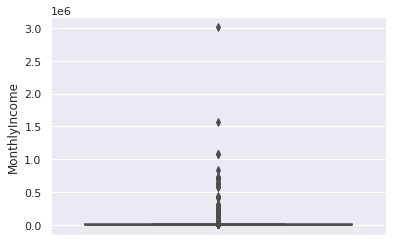

In [ ]:

sns.boxplot(data=dataset, y='MonthlyIncome')


In [ ]:

len(dataset[dataset['MonthlyIncome']>20000])


2370

- Nhận thấy các giá trị > 20000 là ko đáng kể nên có thể xem chúng như 20000

In [ ]:

dataset.loc[dataset['MonthlyIncome']>20000, 'MonthlyIncome']=20000
dataset['MonthlyIncome'].describe()


count    128700.000000
mean       6524.341111
std        4020.407067
min        1000.000000
25%        3600.000000
50%        5541.000000
75%        8375.000000
max       20000.000000
Name: MonthlyIncome, dtype: float64

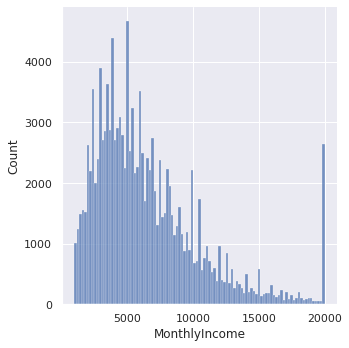

In [ ]:

sns.displot(data=dataset, x='MonthlyIncome')


###3. NumberOfOpenCreditLinesAndLoans : Số tài khoản tín dụng (bao gồm mọi hình thức từ chi tiêu tới thế chấp nhà, xe,...)



In [ ]:

dataset['NumberOfOpenCreditLinesAndLoans'].describe()


count    128700.000000
mean          8.457793
std           5.078733
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          57.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

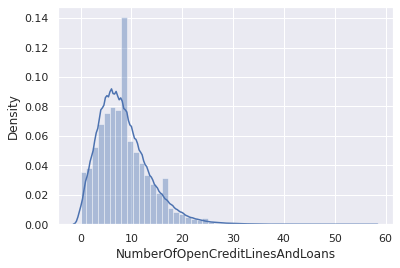

In [ ]:

sns.distplot(dataset['NumberOfOpenCreditLinesAndLoans'])


- Nhận thấy các giá trị >= 30 ko được thể hiện rõ trên biểu đồ -> có thể đây là các giá trị ngoại lai

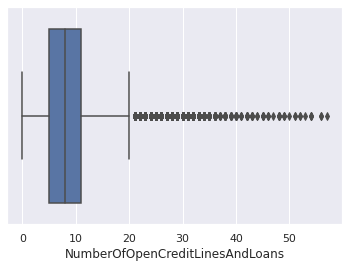

In [ ]:

sns.boxplot(dataset['NumberOfOpenCreditLinesAndLoans'])


In [ ]:

len(dataset[dataset['NumberOfOpenCreditLinesAndLoans']>20])


3152

In [ ]:

len(dataset[dataset['NumberOfOpenCreditLinesAndLoans']>30])


273

- Vì số lượng bản ghi > 30 ko quá lớn nên ta sẽ gộp chúng lại giá trị max là 30

In [ ]:

dataset.loc[dataset['NumberOfOpenCreditLinesAndLoans']>30, 'NumberOfOpenCreditLinesAndLoans']=30
dataset['NumberOfOpenCreditLinesAndLoans'].describe()


count    128700.000000
mean          8.445315
std           5.011131
min           0.000000
25%           5.000000
50%           8.000000
75%          11.000000
max          30.000000
Name: NumberOfOpenCreditLinesAndLoans, dtype: float64

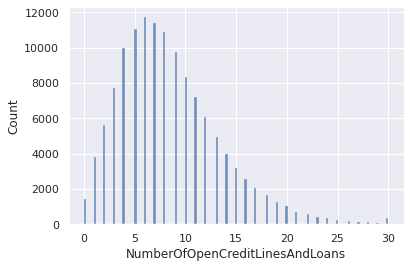

In [ ]:

sns.histplot(dataset['NumberOfOpenCreditLinesAndLoans'])


###4. NumberRealEstateLoansOrLines : Số lượng các khoản vay thế chấp và bất động sản bao gồm hạn mức tín dụng vốn chủ sở hữu nhà


In [ ]:

dataset['NumberRealEstateLoansOrLines'].describe()



count    128700.000000
mean          1.014375
std           1.081887
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max          32.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

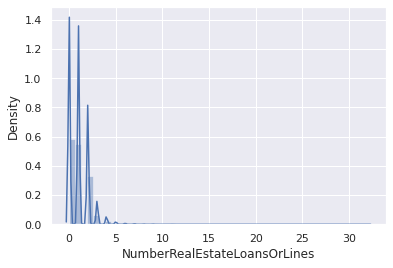

In [ ]:

sns.distplot(dataset['NumberRealEstateLoansOrLines'])


- Nhận thấy rằng các giá trị >= 6 ko được thể hiện rõ -> giá trị ngoại lai

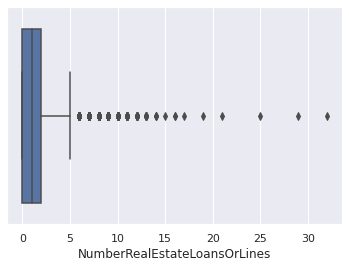

In [ ]:

sns.boxplot(dataset['NumberRealEstateLoansOrLines'])


- Qua biểu đồ boxplot, rõ ràng các giá trị này ko nhiều

In [ ]:

len(dataset[dataset['NumberRealEstateLoansOrLines']>5])


546

- Ta sẽ gộp các giá trị > 5 lại giá trị max là 5

In [ ]:

dataset.loc[dataset['NumberRealEstateLoansOrLines']>5, 'NumberRealEstateLoansOrLines']=5
dataset['NumberRealEstateLoansOrLines'].describe()


count    128700.000000
mean          1.003287
std           1.012143
min           0.000000
25%           0.000000
50%           1.000000
75%           2.000000
max           5.000000
Name: NumberRealEstateLoansOrLines, dtype: float64

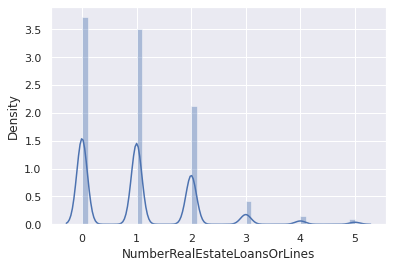

In [ ]:

sns.distplot(dataset['NumberRealEstateLoansOrLines'])


###5. Age

In [ ]:

dataset['age'].describe()


count    128700.000000
mean         52.401127
std          14.777382
min           0.000000
25%          41.000000
50%          52.000000
75%          63.000000
max         109.000000
Name: age, dtype: float64

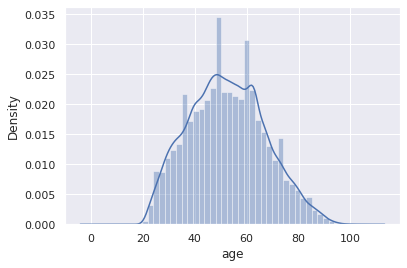

In [ ]:

sns.distplot(dataset['age'])


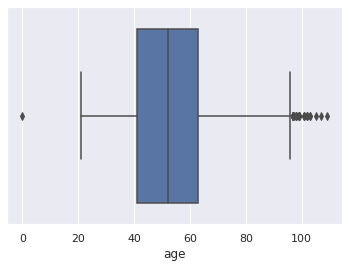

In [ ]:

sns.boxplot(dataset['age'])


- Có thể thấy các giá trị <20 và >80 khá ít nên có thể xem như ngoại lệ, do đó ta sẽ gộp các giá trị này lại 


In [ ]:

dataset.loc[dataset['age']>80, 'age']=80
dataset.loc[dataset['age']<20, 'age']=20


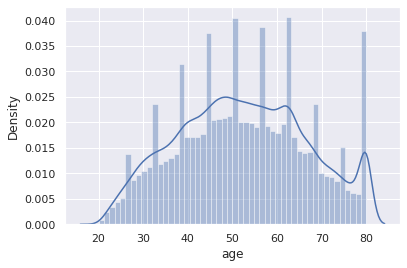

In [ ]:

sns.distplot(dataset['age'])


In [ ]:

dataset['age'].describe()


count    128700.000000
mean         52.224685
std          14.393477
min          20.000000
25%          41.000000
50%          52.000000
75%          63.000000
max          80.000000
Name: age, dtype: float64

## Phân tích dữ liệu

In [ ]:

dataset.corr()


,Unnamed: 0,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
Unnamed: 0,1.000000,0.001509,0.002236,0.004096,0.000313,0.000302,0.001126,0.004353,-0.002381,-0.002153,0.000344,-0.001562
SeriousDlqin2yrs,0.001509,1.000000,-0.002394,-0.107562,0.217249,0.039299,-0.048929,-0.020784,0.250630,-0.011638,0.174732,0.045379
RevolvingUtilizationOfUnsecuredLines,0.002236,-0.002394,1.000000,-0.005435,-0.002435,0.001032,0.016595,-0.011082,-0.003139,0.007220,-0.002346,-0.001153
age,0.004096,-0.107562,-0.005435,1.000000,-0.069971,-0.054752,0.075120,0.151833,-0.077825,0.037651,-0.062778,-0.205380
NumberOfTime30-59DaysPastDueNotWorse,0.000313,0.217249,-0.002435,-0.069971,1.000000,0.079709,-0.007274,0.078875,0.100643,0.037381,0.162918,0.064761
DebtRatio,0.000302,0.039299,0.001032,-0.054752,0.079709,1.000000,-0.084456,0.278832,-0.025717,0.410456,0.022592,0.079673
MonthlyIncome,0.001126,-0.048929,0.016595,0.075120,-0.007274,-0.084456,1.000000,0.204679,-0.052708,0.292466,-0.032179,0.151241
NumberOfOpenCreditLinesAndLoans,0.004353,-0.020784,-0.011082,0.151833,0.078875,0.278832,0.204679,1.000000,-0.098116,0.435670,-0.020501,0.066918
NumberOfTimes90DaysLate,-0.002381,0.250630,-0.003139,-0.077825,0.100643,-0.025717,-0.052708,-0.098116,1.000000,-0.074968,0.088476,0.024953
NumberRealEstateLoansOrLines,-0.002153,-0.011638,0.007220,0.037651,0.037381,0.410456,0.292466,0.435670,-0.074968,1.000000,-0.025722,0.137268


In [ ]:

dataset = dataset.rename(columns={'Unnamed: 0': 'Unknown',
                                  'SeriousDlqin2yrs': 'Serious2yrs',
                                  'RevolvingUtilizationOfUnsecuredLines': 'UnsecLines',
                                  'NumberOfTime30-59DaysPastDueNotWorse': 'Late3059',
                                  'DebtRatio': 'DebtRatio',
                                  'MonthlyIncome': 'MonthlyIncome',
                                  'NumberOfOpenCreditLinesAndLoans': 'OpenCredit',
                                  'NumberOfTimes90DaysLate': 'Late90',
                                  'NumberRealEstateLoansOrLines': 'RealEstate',
                                  'NumberOfTime60-89DaysPastDueNotWorse': 'Late6089',
                                  'NumberOfDependents': 'Depends'})


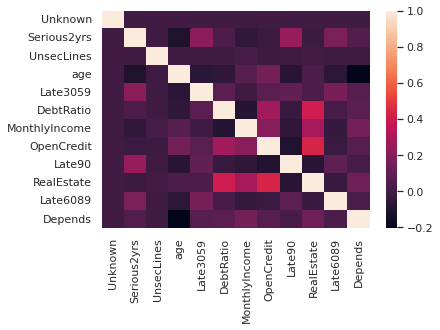

In [ ]:

sns.heatmap(dataset.corr())


- Biểu đồ heatmap cho thấy rõ ràng hơn sự tương quan giữa các trường dữ liệu
- Nếu màu sắc ô càng nhạt, 2 trường dữ liệu càng liên quan mật thiết với nhau và ngược lại, nếu màu sắc càng đậm chứng tỏ chúng hầu như ko liên quan đến nhau 

###DebtRatio + NumberRealEstateLoansOrLines

DebtRatio - tỷ lệ nợ là 1 trường dữ liệu quan trọng trong cho vay tín dụng vì các ngân hàng và người cho vay sẽ dựa vào đó để xem xét 1 người có khả năng chi trả nợ ko trước khi bắt đầu rơi vào tình trạng khó khăn về tài chính, họ sẽ dựa vào đó để đặt ra khoản cho vay. DebtRatio lý tưởng <= 30%, và người dùng sẽ cố gắng giữ cho DebtRatio của mình ở mức thấp nhất có thể để tránh mất kiểm soát nợ nần, đồng thời có thể ước tính để đầu tư cho các khoản vay lớn


Dựa trên cách tính DebtRatio, cách thông thường nhất để giữ DebtRatio ở mức lý tưởng là tăng thu nhập hàng tháng (MonthlyIncome) và giảm số chi tiêu tín dụng + các khoản chi khác trong tháng

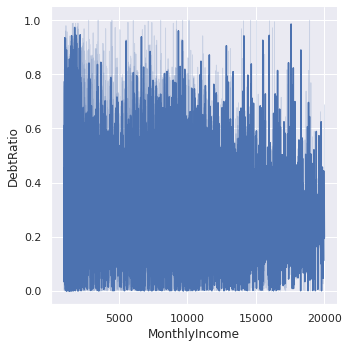

In [ ]:

sns.relplot(data=dataset, x='MonthlyIncome', y="DebtRatio", kind="line")


- Tuy nhiên khi nhìn vào biểu đồ, ta thấy DebtRatio biến động thất thường theo MonthyIncome chứ ko theo quy luật nào, do đó còn có yếu tố khác tác động đến DebtRatio

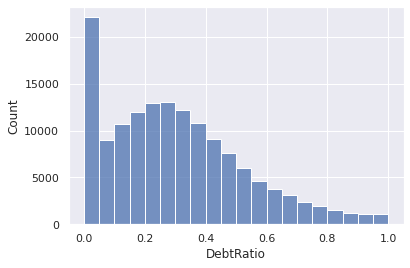

In [ ]:

sns.histplot(dataset['DebtRatio'], bins=20)


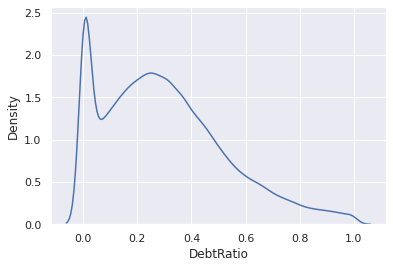

In [ ]:

sns.kdeplot(dataset['DebtRatio'])


- Nhìn vào biểu đồ phân bố tần suất histogram và biểu đồ mật độ kde, ta thấy:
    + Biểu đồ có dạng Double-Peaked, tức là ở đây có sự bất thường về phân phối tần suất DebtRatio. Do đó cần tìm ra nguyên nhân dẫn đến sự ko cân xứng này
    + Thông thường nguyên nhân dẫn đến biểu đồ có dạng Double-Peaks là vì đây là kết quả của 2 quá trình phân tích có phân phối khác nhau được gộp lại 


- Có thể thấy DebtRatio có liên quan đến NumberOfOpenCreditLinesAndLoans và NumberRealEstateLoansOrLines thông qua biểu đồ heatmap

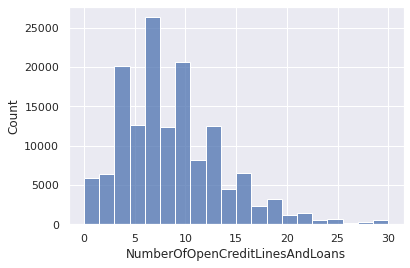

In [ ]:

sns.histplot(dataset['NumberOfOpenCreditLinesAndLoans'], bins=20)


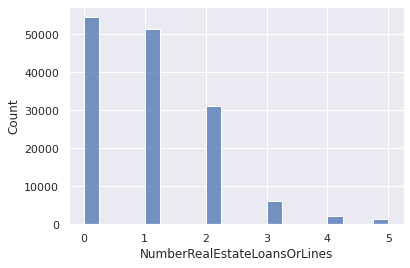

In [ ]:

sns.histplot(dataset['NumberRealEstateLoansOrLines'], bins=20)


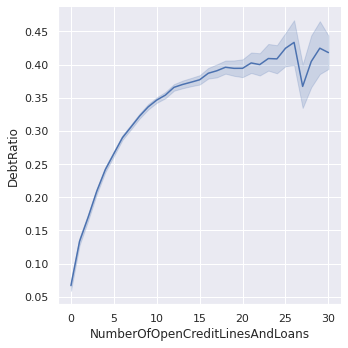

In [ ]:

sns.relplot(data=dataset, x="NumberOfOpenCreditLinesAndLoans", y="DebtRatio", kind="line")


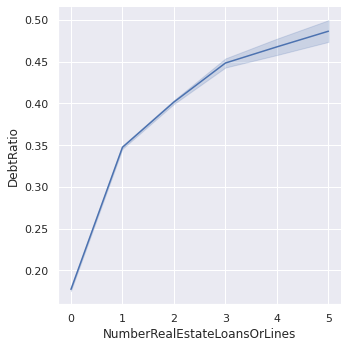

In [ ]:

sns.relplot(data=dataset, x="NumberRealEstateLoansOrLines", y="DebtRatio", kind="line")


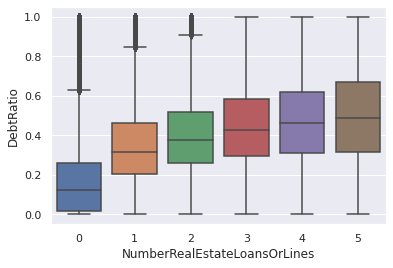

In [ ]:

sns.boxplot(data=dataset, x='NumberRealEstateLoansOrLines', y='DebtRatio')


- Nhận xét : DebtRatio tương quan đồng biến với NumberOfOpenCreditLinesAndLoans và NumberRealEstateLoansOrLines, tức là DebtRatio sẽ tăng nếu 2 đại lượng này tăng, mà chúng còn tăng rất nhanh. Chỉ cần có 1 khoản vay thế chấp nhà đất,... thì DebtRatio đã tăng lên đến 0.3, 0.35 -> đây là 2 đại lượng dẫn đến DebtRatio tăng nhanh chóng. Do đó, để giảm tỷ lệ nợ thì người dùng cần giảm thiểu các khoản vay thế chấp nhà đất,... tương ứng

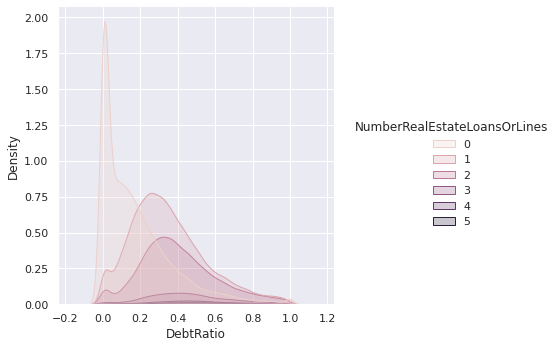

In [ ]:

sns.displot(data=dataset, x="DebtRatio", hue="NumberRealEstateLoansOrLines", kind="kde", fill=True)


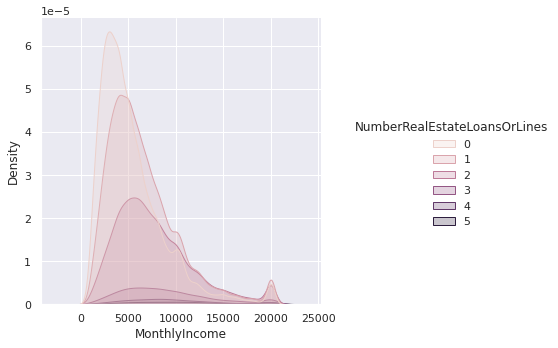

In [ ]:

sns.displot(data=dataset, x="MonthlyIncome", hue="NumberRealEstateLoansOrLines", kind="kde", fill=True)


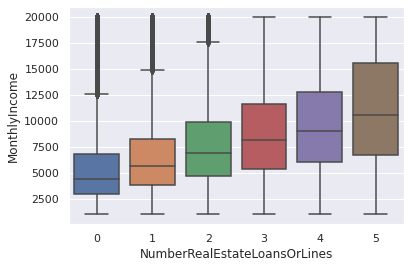

In [ ]:

sns.boxplot(data=dataset, y="MonthlyIncome", x="NumberRealEstateLoansOrLines")


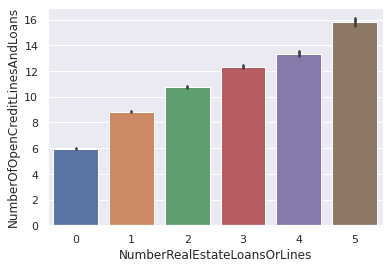

In [ ]:

sns.barplot(data=dataset, y="NumberOfOpenCreditLinesAndLoans", x="NumberRealEstateLoansOrLines")


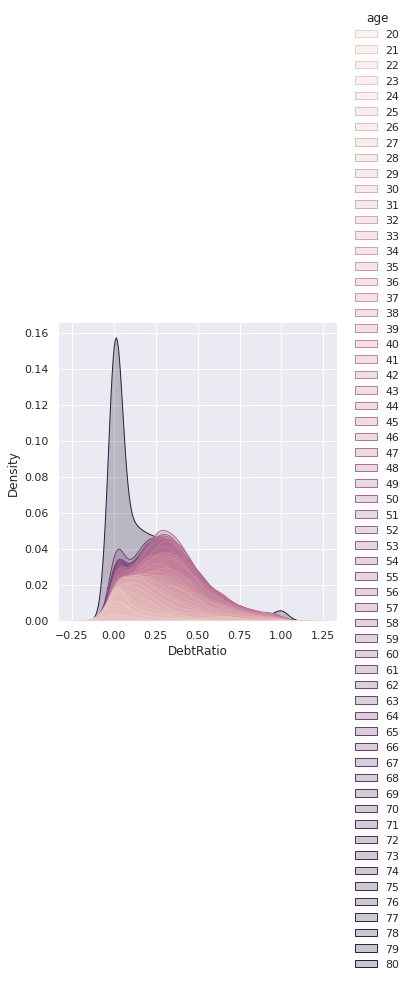

In [ ]:

sns.displot(data=dataset, x="DebtRatio", hue="age", kind="kde", fill=True)
